In [2]:
import os

os.getcwd()

'/home/ec2-user/SageMaker'

In [2]:
pip install -e preparimb

Obtaining file:///home/ec2-user/SageMaker/preparimb
  Running setup.py develop for preparimb-klih
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importamos el archivo desde amazon s3
import pandas as pd

df = pd.read_csv('aqui_ruta_del_bucket/conjunto_fraude.csv')
df['feature_5']=df['feature_5'].astype(object)

# Utilizando modulo de separación

In [2]:
#importamos de nuestra libreria el modulo de separacion
from preparimb.preparanding_data_set import separating_data_set

#dividimos la data con una de las funciones de nuestra libreria.
clase_separacion = separating_data_set.split_data_and_target()

[X, y] = clase_separacion.fit(df, 'target')

In [3]:
X.shape

(736771, 13)

In [6]:
y

0         No Fraude
1         No Fraude
2         No Fraude
3         No Fraude
4         No Fraude
            ...    
736766    No Fraude
736767    No Fraude
736768    No Fraude
736769    No Fraude
736770    No Fraude
Name: target, Length: 736771, dtype: object

# Utilizando modulo para graficar.

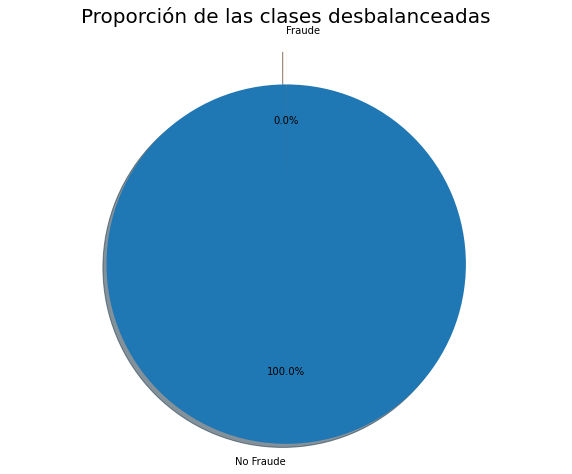

In [7]:
#Ahora utilizamos el modulo para graficar la variable target

from preparimb.preparanding_data_set import plotting_data_set

graficar_target = plotting_data_set.class_ratio()
graficar_target.plot_pie(y, 'desbalanced', 'yes')

# Utilizando modulo de balanceo

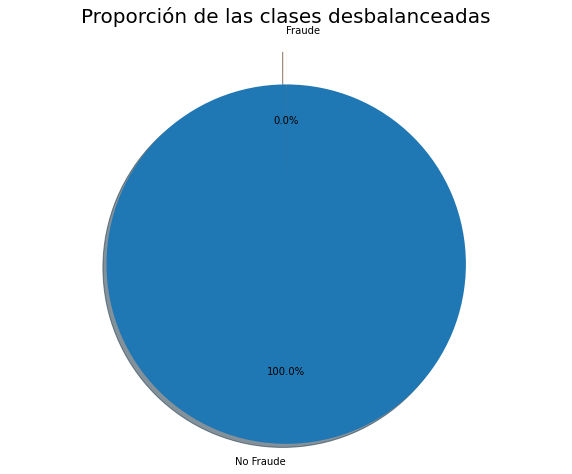

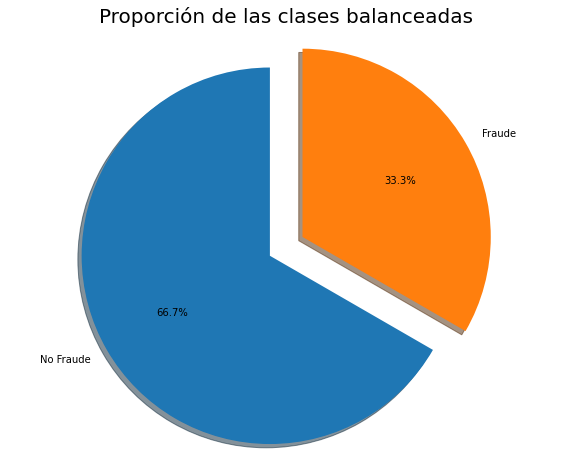

In [8]:
#Como esta claramente desbalanceado, utilizaremos el modulo para balancear.
from preparimb.preparanding_data_set import balancing_data_set

balancing_prueba = balancing_data_set.balance_target()
[x_balan, y_balan] = balancing_prueba.fit_balance(df, 'target')


### Utilizando nuevamente el modulo de representación grafica para datos balanceados

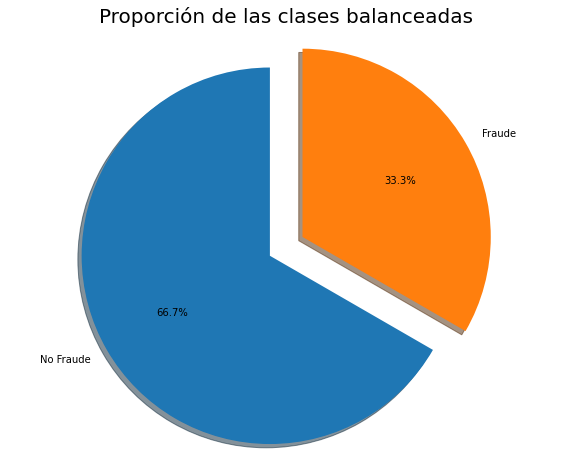

In [9]:
graficar_target.plot_pie(y_balan, 'balanced', 'yes')

# Utilizando modulo de preprocesamiento

/home/ec2-user/SageMaker/preparimb/preparanding_data_set/preprocessing_data_set.py:32: UserWarning: All the .csv and .txt files in the path you set below will be read and concatenated. Make sure that the folder contains only those that you require for preprocessing or data balancing.
  return warnings.warn('All the .csv and .txt files in the path you set below will be read and concatenated. Make sure that the folder contains only those that you require for preprocessing or data balancing.')


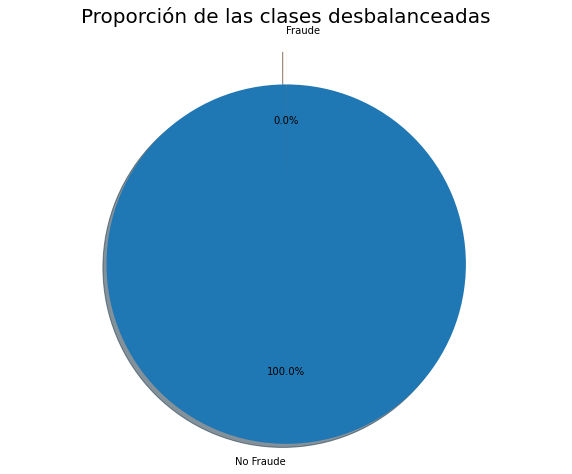

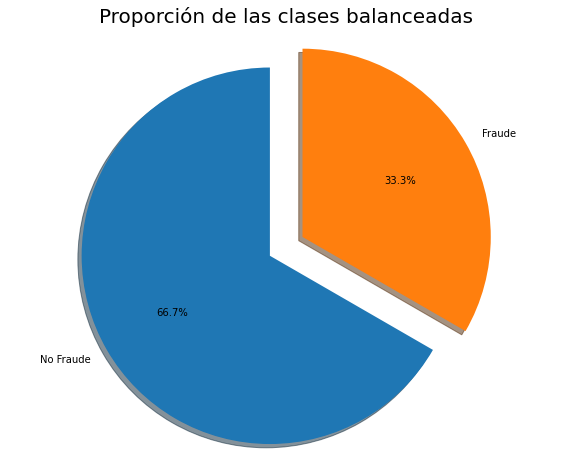

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [11]:
from preparimb.preparanding_data_set import preprocessing_data_set

preprocessing_prueba = preprocessing_data_set.apply_tranform(target_plot = 'yes')
preprocessing_prueba.fit('/home/ec2-user/SageMaker/data', 'target', ordinal_Category = ['DIAMETRO'])

### De la ejecución del codigo anterior obtenemos la creación de las siguientes carpetas dentro de la ruta de entrada.

Esta carpeta contiene un archivo comprimido que contiene los archivos joblib con las transformaciones hechas en las diversas caracteristicas y además el nombre de las columnas luego de estos cambios.

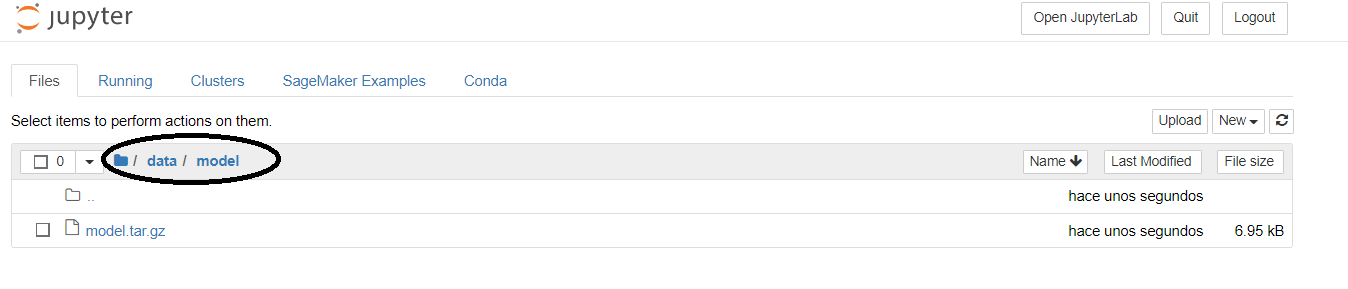

En las carpetas siguientes se encuentran los archivos .csv con los conjuntos correspondientes para trabajar de una manera más rapida en la modelación de problemas.

- balanced: contiene el archivo .csv con el conjunto original luego de aplicar función para balancear las clases. 
- baseline_input: contiene el archivo .csv con el conjunto de entrenamiento inicial, sin aplicar ninguna transformación a las caracteristicas (numericas, categricos u ordinales).
- train: Archivo .csv con el conjunto de entrenamiento después de aplicar la transformación de características tanto categóricas (nominales y ordinales) como numéricas.
- test: Archivo .csv con el conjunto de prueba después de aplicar la transformación de características tanto categóricas (nominales y ordinales) como numéricas.
- validation: Archivo .csv con el conjunto de validación después de aplicar la transformación de características tanto categóricas (nominales y ordinales) como numéricas.

![Captura%20de%20pantalla%20%28607%29.png](attachment:Captura%20de%20pantalla%20%28607%29.png)